
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 2
-----

In [1]:
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.patches as patches
import seaborn as sns

import os
import sys

genome_size = 2897.310462
import warnings
warnings.filterwarnings('ignore')

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [3]:
sys.path.append(str(root_dir))
import scripts.utils as ut

-----
##### Load & prepare data 

In [5]:
## Load patients metadata
kzm_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.txt'), sep='\t', index_col=0)
low_samples = kzm_md[kzm_md.Burden=='low'].index.tolist()

In [158]:
#drivers = pd.read_csv('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/source_data/KZM611_vep_drivers_all_exact_clean_4SuppTable.txt', sep='\t')
#drivers_1 = pd.read_csv(os.path.join(root_dir, 'source_data/Supp_Table5_rev2.txt'), sep='\t')
drivers = pd.read_csv('/Users/mehdi/Documents/Nature_Submission/source_data/Supp_Table5_rev4b.txt', sep='\t')

# /Users/mehdi/Documents/Supp_Table5_rev2.txt
drivers.head(2)

,Hugo_Symbol,Entrez_Gene_Id,HGNC_ID,NCBI_Build,Chromosome,Start_Position,End_Position,GENOMIC_WT_ALLELE,GENOMIC_MUT_ALLELE,Variant_Classification,...,gnomad_nT,exac_nM,exac_nT,EvaluationUsingGermline,Evaluation,AB_frac_less_0.3,AB_N,AB_score,gnomAD_AC,ExAC_AC
0,ACVR2A,92,173,GRCh37,2,148683686,148683686,A,NaN,Frame_Shift_Del,...,-1,-1,-1,bad,good,0.969697,33,15.5,3,4
1,ASPM,259266,19048,GRCh37,1,197091176,197091176,A,NaN,Splice_Region,...,-1,-1,-1,bad,good,0.950000,40,18.0,3,13


In [136]:
eval2 = []
for i in range(len(drivers)):
    if drivers.AB_N.iloc[i] > 50 and drivers['AB_frac_less_0.3'].iloc[i] > 0.95:
        eval2.append('Fail')
    elif drivers.gnomAD_AC.iloc[i] > 50 or drivers.ExAC_AC.iloc[i] > 50:
        eval2.append('Fail')
    else:
        eval2.append('Pass')

drivers['Evaluation2'] = eval2

In [137]:
drivers.to_csv('/Users/mehdi/Documents/Nature_Submission/source_data/Supp_Table5_rev4partial.txt', sep='\t', index=None)

In [132]:
drivers['Evaluation2'] = ['bad' if drivers.AB_N.iloc[x] > 50 and drivers['AB_frac_less_0.3'].iloc[x] > 0.95 else 'good' for x in range(len(drivers))]

In [138]:
drivers.to_csv('/Users/mehdi/Documents/Nature_Submission/source_data/Supp_Table5_rev4b.txt', sep='\t', index=None)


In [145]:
drivers.shape[0], drivers[drivers.Evaluation=='good'].shape[0], drivers[drivers.EvaluationUsingGermline=='good'].shape[0]

(641, 455, 445)

In [159]:
drivers = drivers[drivers.EvaluationUsingGermline=='good']
drivers.shape

(445, 35)

In [147]:
drivers.Hugo_Symbol.nunique()

129

-----
## Panel a

In [152]:
all_genes_df = ut.get_drivers_mat(drivers, kzm_md, 'Sample_ID')

(455, 35)


In [111]:
def build_cm_2col(t1, t2):
    colors = [(1, 1, 1)]
    colors.append(tuple([x/256 for x in t1]))
    colors.append(tuple([x/256 for x in t2]))
    n_bins = 80  # Discretizes the interpolation into bins
    cmap_name = 'my_list'
    return mc.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def build_cm_1col(t1):
    colors = [(1, 1, 1)]
    colors.append(tuple([x/256 for x in t1]))
    n_bins = 20  # Discretizes the interpolation into bins
    cmap_name = 'my_list'
    return mc.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

In [112]:
cm1 = build_cm_1col((49,54,149))
cm2 = build_cm_1col((165,0,38))

In [153]:
all_genes_2plus = all_genes_df[all_genes_df.Total>2].copy()
all_genes_2plus.columns = [x.replace('-', '\n') if '-' in x else x for x in all_genes_2plus.columns]
all_genes_2p_thr = all_genes_2plus.copy()
all_genes_2p_thr['pret'] = all_genes_2p_thr['Primary\nNaive'] + all_genes_2p_thr['Advanced\nNaive']
all_genes_2p_thr['post'] = all_genes_2p_thr['Primary\nTreated'] + all_genes_2p_thr['Advanced\nTreated']
all_genes_2p_thr.head(3)

,Primary\nNaive,Primary\nTreated,Advanced\nNaive,Advanced\nTreated,Total,Percentage,pret,post
TP53,48,8,1,27,84,14.0,49,35
H3F3A,20,0,0,1,21,3.0,20,1
PIK3CA,15,1,0,2,18,3.0,15,3


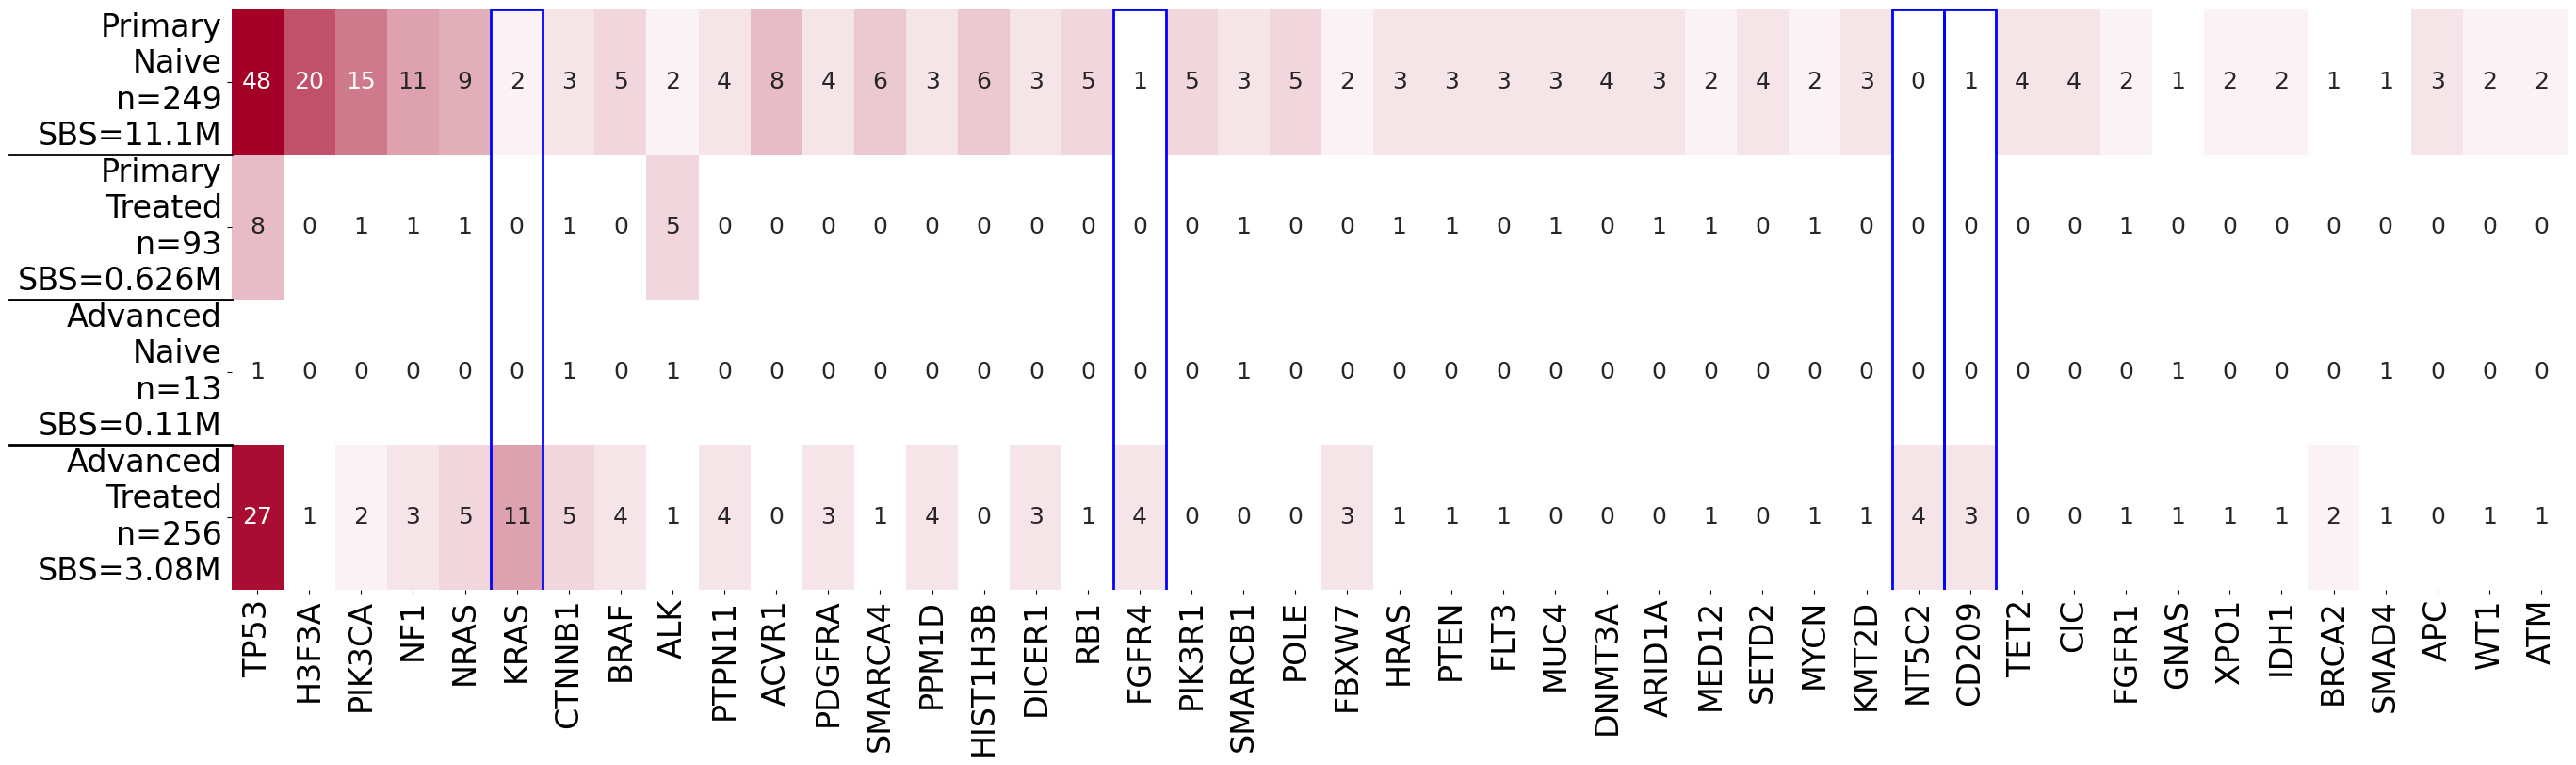

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

f, axes = plt.subplots(figsize=(32,8))

all_genes_2plus_2plot = all_genes_2plus.iloc[:, 0:4].copy()
all_genes_2plus_2plot.columns = [
    'Primary\nNaive\nn=249\nSBS=11.1M',
    'Primary\nTreated\nn=93\nSBS=0.626M',
    'Advanced\nNaive\nn=13\nSBS=0.11M',
    'Advanced\nTreated\nn=256\nSBS=3.08M'
]

ax = sns.heatmap(
    all_genes_2plus_2plot.T,
    cmap=cm2,
    vmax=29,
    cbar=False,
    annot=True,
    annot_kws={"fontsize":18}
)

# Highlight specific columns if desired
for i in range(all_genes_2plus_2plot.shape[0]):
    if (all_genes_2plus_2plot.iloc[i, 1] + all_genes_2plus_2plot.iloc[i, 3]) / \
       (all_genes_2plus_2plot.iloc[i, 0] + all_genes_2plus_2plot.iloc[i, 2]) > 2:
        rect = patches.Rectangle((i, 0), 1, 5, linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

plt.xticks(fontsize=24, rotation=90)
plt.yticks(fontsize=24, rotation=0)

# --- Add horizontal separator lines outside the plot (between y-axis labels) ---
yticks = ax.get_yticks()
for y in yticks[:-1]:  # skip the last one
    f.canvas.draw()  # ensure positions are known
    # draw a short horizontal line just to the left of y-tick labels
    ax.plot(
        [0, -0.095], [y+0.5, y+0.5],  # small segment (in axes fraction)
        transform=ax.get_yaxis_transform(),
        color='black', linewidth=2, clip_on=False
    )

plt.savefig(os.path.join(fig_out, 'ExFig_2b_rev2.pdf'), bbox_inches="tight", dpi=300)

-----
## Panel b

In [155]:
rel_counts_low, abs_counts_low = ut.get_drivers_type_state(drivers, kzm_md, burden='low')
rel_counts_all, abs_counts_all = ut.get_drivers_type_state(drivers, kzm_md)

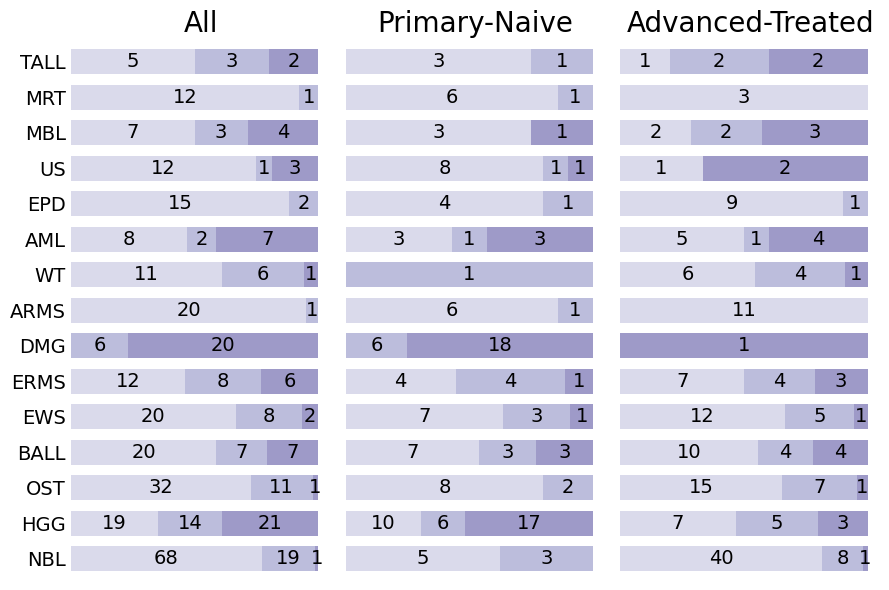

In [156]:
tab20c_cols = sns.color_palette("tab20c")
mycolors = tab20c_cols[-7:-4][::-1]

nrows = 1
ncols = 3

f, axes = plt.subplots(nrows, ncols, figsize=(9,6), sharey=True)

ax0 = rel_counts_all[rel_counts_all.Condition=='All'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='All', width=0.7, ax=axes[0])
ax0.set_title('All', fontsize=20)
for sp in ax0.spines:
    ax0.spines[sp].set_visible(False)
ax0.tick_params(axis=u'both', which=u'both',length=0, labelsize=14)
#ax0.tick_params(axis='x', labelsize=20)
ax0.xaxis.set_ticklabels([])
ax0.get_legend().remove()
labels2 = [f'{int(i)}' for i in abs_counts_all[abs_counts_all.Condition=='All'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax0.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax0.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=14)
ax0.set_ylabel('')

ax1 = rel_counts_all[rel_counts_all.Condition=='Primary-Naive'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='Primary-Naive', width=0.7, ax=axes[1])
ax1.set_title('Primary-Naive', fontsize=20)
for sp in ax1.spines:
    ax1.spines[sp].set_visible(False)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.xaxis.set_ticklabels([])
ax1.get_legend().remove()
ax1.yaxis.label.set_size(40)
labels2 = [f'{int(i)}' for i in abs_counts_all[abs_counts_all.Condition=='Primary-Naive'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax1.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax1.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=14)

ax4 = rel_counts_all[rel_counts_all.Condition=='Advanced-Treated'].drop(['Condition'], axis=1).set_index('Type').plot.barh(stacked=True, color=mycolors, title='Advanced-Treated', width=0.7, ax=axes[2])
ax4.set_title('Advanced-Treated', fontsize=20)
for sp in ax4.spines:
    ax4.spines[sp].set_visible(False)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax4.xaxis.set_ticklabels([])
ax4.get_legend().remove()
labels2 = [f'{int(i)}' for i in abs_counts_all[abs_counts_all.Condition=='Advanced-Treated'].drop(['Condition'], axis=1).set_index('Type').to_numpy().flatten(order='F')]
for i, patch in enumerate(ax4.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    if int(labels2[i]) > 0:
        ax4.annotate(labels2[i], (x, y), ha='center', va='center', c='black', fontsize=14)


plt.tight_layout()
plt.savefig(os.path.join(fig_out, 'ExFig_2cAll_rev2.pdf'), bbox_inches="tight")


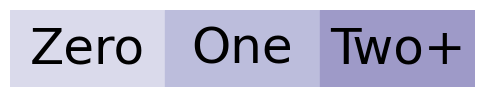

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tab20c_cols = sns.color_palette("tab20c")
mycolors = tab20c_cols[-7:-4][::-1]

labels = ['Zero', 'One', 'Two+']

fig, ax = plt.subplots(figsize=(6, 1))
for i, (c, label) in enumerate(zip(mycolors, labels)):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=c))
    ax.text(i + 0.5, 0.8, label, ha='center', va='top', fontsize=36)

ax.set_xlim(0, 3)
ax.set_ylim(0, 1)
ax.axis('off')
plt.savefig(os.path.join(fig_out, 'ExFig_2c_leg_rev.pdf'), bbox_inches="tight")


In [50]:
A_col = "#3288BD"
B_col = "#D53E4F"

In [33]:
plat_sig_samples.columns

Index(['Sample_id', 'Patient_id', 'Tumor', 'Days_from', 'Cisplatin_dose',
       'Carboplatin_dose', 'Oxaliplatin_dose', 'Cisplatin', 'Carboplatin',
       'Oxaliplatin', 'SBS', 'Size', 'Days_log', 'SBS_log', 'Platin_sig',
       'Platin_sbs', 'Platin_dbs', 'Platin_id', 'Total_drugs', 'cos_total',
       'nonCos_total', 'plat_total', 'Grouping_1', 'Grouping_2', 'Grouping_3',
       'Grouping_4', 'State', 'Cohort'],
      dtype='object')

In [114]:
plat_sig_samples = pd.read_csv(os.path.join(root_dir, 'source_data/kzm_plat_sigs_v3.tsv'), sep='\t')

plat_sig_samples = plat_sig_samples[(plat_sig_samples.SBS>1450) & (plat_sig_samples.Days_from>90)]
plat_sig_samples.shape

(111, 28)

In [115]:
plat_sig_low = plat_sig_samples[plat_sig_samples.SBS<25000]

In [116]:
plat_sig_samples.head(2)

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Total_drugs,cos_total,nonCos_total,plat_total,Grouping_1,Grouping_2,Grouping_3,Grouping_4,State,Cohort
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.0,Y,Y,N,...,YYN,15254,588,15456,Y,Y,Y,Y,Advanced-Treated,KiCS
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.0,Y,N,N,...,YNN,0,0,0,N,N,N,N,Advanced-Treated,KiCS


In [117]:
pt_neg_samples = plat_sig_samples[(plat_sig_samples.Grouping_4=='N') & (plat_sig_samples.State=='Primary-Treated')].Sample_id.tolist()
pt_pos_samples = plat_sig_samples[(plat_sig_samples.Grouping_4=='Y') & (plat_sig_samples.State=='Primary-Treated')].Sample_id.tolist()
at_neg_samples = plat_sig_samples[(plat_sig_samples.Grouping_4=='N') & (plat_sig_samples.State=='Advanced-Treated')].Sample_id.tolist()
at_pos_samples = plat_sig_samples[(plat_sig_samples.Grouping_4=='Y') & (plat_sig_samples.State=='Advanced-Treated')].Sample_id.tolist()
len(pt_neg_samples), len(pt_pos_samples), len(at_neg_samples), len(at_pos_samples)

(10, 11, 31, 59)

In [160]:
drivers[drivers.Sample_ID.isin(pt_neg_samples)].shape[0], \
drivers[drivers.Sample_ID.isin(pt_pos_samples)].shape[0], \
drivers[drivers.Sample_ID.isin(at_neg_samples)].shape[0], \
drivers[drivers.Sample_ID.isin(at_pos_samples)].shape[0]


(6, 6, 16, 38)

In [119]:
6/10, 6/11, 13/31, 43/59, 19/41, 49/70

(0.6,
 0.5454545454545454,
 0.41935483870967744,
 0.7288135593220338,
 0.4634146341463415,
 0.7)

In [149]:
6/10, 5/11, 14/31, 44/59, 20/41, 49/70

(0.6,
 0.45454545454545453,
 0.45161290322580644,
 0.7457627118644068,
 0.4878048780487805,
 0.7)

In [161]:
# reviewer
6/10, 6/11, 16/31, 38/59, 22/41, 44/70

(0.6,
 0.5454545454545454,
 0.5161290322580645,
 0.6440677966101694,
 0.5365853658536586,
 0.6285714285714286)

In [163]:
# reviewer
6/9, 5/10, 6/28, 26/56, 12/37, 31/66

(0.6666666666666666,
 0.5,
 0.21428571428571427,
 0.4642857142857143,
 0.32432432432432434,
 0.4696969696969697)

In [120]:
pt_neg_low = plat_sig_low[(plat_sig_low.Grouping_4=='N') & (plat_sig_low.State=='Primary-Treated')].Sample_id.tolist()
pt_pos_low = plat_sig_low[(plat_sig_low.Grouping_4=='Y') & (plat_sig_low.State=='Primary-Treated')].Sample_id.tolist()
at_neg_low = plat_sig_low[(plat_sig_low.Grouping_4=='N') & (plat_sig_low.State=='Advanced-Treated')].Sample_id.tolist()
at_pos_low = plat_sig_low[(plat_sig_low.Grouping_4=='Y') & (plat_sig_low.State=='Advanced-Treated')].Sample_id.tolist()
len(pt_neg_low), len(pt_pos_low), len(at_neg_low), len(at_pos_low)

(9, 10, 28, 56)

In [162]:
drivers[drivers.Sample_ID.isin(pt_neg_low)].shape[0], \
drivers[drivers.Sample_ID.isin(pt_pos_low)].shape[0], \
drivers[drivers.Sample_ID.isin(at_neg_low)].shape[0], \
drivers[drivers.Sample_ID.isin(at_pos_low)].shape[0]


(6, 5, 6, 26)

In [122]:
6/9, 5/10, 6/28, 25/56, 12/37, 30/66

(0.6666666666666666,
 0.5,
 0.21428571428571427,
 0.44642857142857145,
 0.32432432432432434,
 0.45454545454545453)

In [151]:
6/9, 5/10, 6/28, 26/56, 12/37, 31/66

(0.6666666666666666,
 0.5,
 0.21428571428571427,
 0.4642857142857143,
 0.32432432432432434,
 0.4696969696969697)

In [41]:
6/10, 6/11, 16/31, 38/59

(0.6, 0.5454545454545454, 0.5161290322580645, 0.6440677966101694)

In [68]:
6/10, 6/11, 13/31, 45/59, 19/41, 51/70

(0.6,
 0.5454545454545454,
 0.41935483870967744,
 0.7627118644067796,
 0.4634146341463415,
 0.7285714285714285)

In [49]:
6/9, 5/10, 6/28, 26/56

(0.6666666666666666, 0.5, 0.21428571428571427, 0.4642857142857143)

In [69]:
6/9, 5/10, 6/28, 25/56, 13/37, 30/66

(0.6666666666666666,
 0.5,
 0.21428571428571427,
 0.44642857142857145,
 0.35135135135135137,
 0.45454545454545453)

In [26]:
plat_sig_samples.State.value_counts()

State
Advanced-Treated    85
Primary-Treated     32
Name: count, dtype: int64

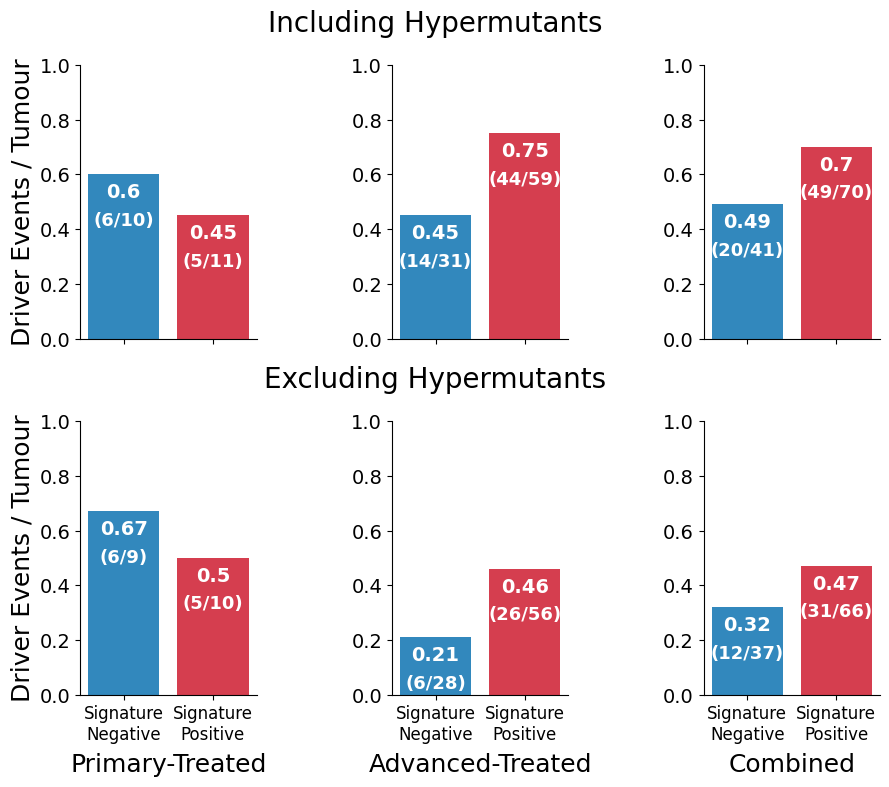

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------
# My Evaluation
# ---------------------------
'''table1 = pd.DataFrame({
    'Group': ['Advanced-Naive', 'Advanced-Treated', 'Primary-Naive', 'Primary-Treated'],
    'Events/Sample': [0.58, 0.66, 0.78, 0.52],
    'Fraction': ['(7/12)', '(161/244)', '(182/232)', '(46/89)']
})'''

## All samples

table1 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.49, 0.7],
    'Fraction': ['(20/41)', '(49/70)']
})

table2 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.6, 0.45],
    'Fraction': ['(6/10)', '(5/11)']
})

table3 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.45, 0.75],
    'Fraction': ['(14/31)', '(44/59)']
})

## Low-burden samples
table4 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.32, 0.47],
    'Fraction': ['(12/37)', '(31/66)']
})

table5 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.67, 0.50],
    'Fraction': ['(6/9)', '(5/10)']
})

table6 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.21, 0.46],
    'Fraction': ['(6/28)', '(26/56)']
})

# ---------------------------
# Figure setup
# ---------------------------
fig, axes = plt.subplots(2, 3, figsize=(9, 8))
axes = axes.flatten()
bar_color = '#4C72B0'
highlight_color = '#DD8452'
ymax = 1.0

# ---------------------------
# Helper function to plot
# ---------------------------
def plot_table(ax, df, title, sup_title=None, ylab=None, xtick=None, color_map=None):
    if color_map is None:
        colors = [bar_color] * len(df)
    else:
        colors = [color_map.get(g, bar_color) for g in df['Group']]

    if df['Events/Sample'].max() > 1:
        ymax = df['Events/Sample'].max()
    else:
        ymax = 1.0
    
    bars = ax.bar(df['Group'], df['Events/Sample'], color=colors)#, edgecolor='black')
    ax.set_ylim(0, ymax)
    if ylab:
        ax.set_ylabel('Driver Events / Tumour', fontsize=18)
    #ax.set_title(title, fontsize=12, weight='bold')
    
    # Add fraction labels above bars
    for bar, frac in zip(bars, df['Fraction']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.2, frac,
                ha='center', va='bottom', fontsize=13, fontweight='bold', color='white')
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.1, height,
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')
        
    if sup_title:
        ax.text(0, ymax + 0.1, sup_title,
                ha='center', va='bottom', fontsize=20)
    if title != "":
        ax.text(0.5, 0 - 0.3, title,
                ha='center', va='bottom', fontsize=18)
    if xtick:
        ax.tick_params(axis='x', labelsize=12)
    else:
        ax.set_xticklabels([])
    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='y', labelsize=14)

# ---------------------------
# Panel plotting
# ---------------------------
plot_table(axes[0], table2, "", ylab=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[1], table3, "", "Including Hypermutants",
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[2], table1, "",
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[3], table5, "Primary-Treated", ylab=True, xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[4], table6, "Advanced-Treated", "Excluding Hypermutants", xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[5], table4, "Combined", xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})

# Layout tweaks
plt.tight_layout()

plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'ExFig_2a_rev2.pdf'), dpi=300, bbox_inches='tight')

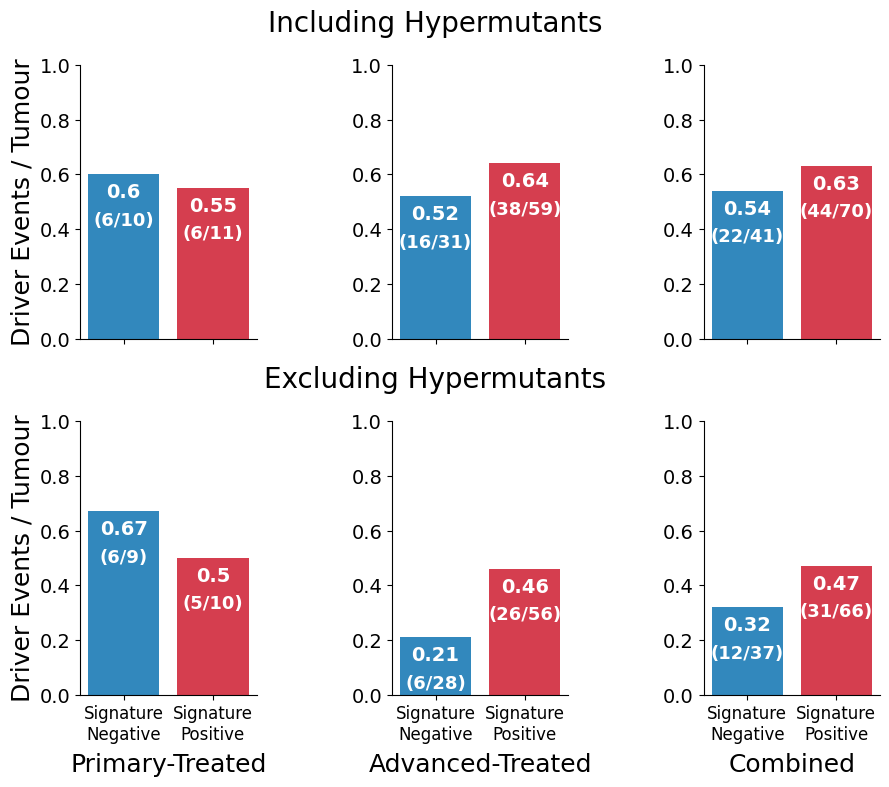

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------
# Input data
# ---------------------------
'''table1 = pd.DataFrame({
    'Group': ['Advanced-Naive', 'Advanced-Treated', 'Primary-Naive', 'Primary-Treated'],
    'Events/Sample': [0.58, 0.66, 0.78, 0.52],
    'Fraction': ['(7/12)', '(161/244)', '(182/232)', '(46/89)']
})'''

## All samples

table1 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.54, 0.63],
    'Fraction': ['(22/41)', '(44/70)']
})

table2 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.6, 0.55],
    'Fraction': ['(6/10)', '(6/11)']
})

table3 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.52, 0.64],
    'Fraction': ['(16/31)', '(38/59)']
})

## Low-burden samples
table4 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.32, 0.47],
    'Fraction': ['(12/37)', '(31/66)']
})

table5 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.67, 0.50],
    'Fraction': ['(6/9)', '(5/10)']
})

table6 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.21, 0.46],
    'Fraction': ['(6/28)', '(26/56)']
})

# ---------------------------
# Figure setup
# ---------------------------
fig, axes = plt.subplots(2, 3, figsize=(9, 8))
axes = axes.flatten()
bar_color = '#4C72B0'
highlight_color = '#DD8452'
ymax = 1.0

# ---------------------------
# Helper function to plot
# ---------------------------
def plot_table(ax, df, title, sup_title=None, ylab=None, xtick=None, color_map=None):
    if color_map is None:
        colors = [bar_color] * len(df)
    else:
        colors = [color_map.get(g, bar_color) for g in df['Group']]

    if df['Events/Sample'].max() > 1:
        ymax = df['Events/Sample'].max()
    else:
        ymax = 1.0
    
    bars = ax.bar(df['Group'], df['Events/Sample'], color=colors)#, edgecolor='black')
    ax.set_ylim(0, ymax)
    if ylab:
        ax.set_ylabel('Driver Events / Tumour', fontsize=18)
    #ax.set_title(title, fontsize=12, weight='bold')
    
    # Add fraction labels above bars
    for bar, frac in zip(bars, df['Fraction']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.2, frac,
                ha='center', va='bottom', fontsize=13, fontweight='bold', color='white')
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.1, height,
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')
        
    if sup_title:
        ax.text(0, ymax + 0.1, sup_title,
                ha='center', va='bottom', fontsize=20)
    if title != "":
        ax.text(0.5, 0 - 0.3, title,
                ha='center', va='bottom', fontsize=18)
    if xtick:
        ax.tick_params(axis='x', labelsize=12)
    else:
        ax.set_xticklabels([])
    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='y', labelsize=14)

# ---------------------------
# Panel plotting
# ---------------------------
plot_table(axes[0], table2, "", ylab=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[1], table3, "", "Including Hypermutants",
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[2], table1, "",
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[3], table5, "Primary-Treated", ylab=True, xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[4], table6, "Advanced-Treated", "Excluding Hypermutants", xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[5], table4, "Combined", xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})

# Layout tweaks
plt.tight_layout()

#plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'ExFig_2a_rev.pdf'), dpi=300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------
# Input data
# ---------------------------
'''table1 = pd.DataFrame({
    'Group': ['Advanced-Naive', 'Advanced-Treated', 'Primary-Naive', 'Primary-Treated'],
    'Events/Sample': [0.58, 0.66, 0.78, 0.52],
    'Fraction': ['(7/12)', '(161/244)', '(182/232)', '(46/89)']
})'''

## All samples

table1 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.61, 1.2],
    'Fraction': ['(25/41)', '(84/70)']
})

table2 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.6, 0.64],
    'Fraction': ['(6/10)', '(7/11)']
})

table3 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.61, 1.3],
    'Fraction': ['(19/31)', '(77/59)']
})

## Low-burden samples
table4 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.41, 0.79],
    'Fraction': ['(15/37)', '(52/66)']
})

table5 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.67, 0.60],
    'Fraction': ['(6/9)', '(6/10)']
})

table6 = pd.DataFrame({
    'Group': ['Signature\nNegative', 'Signature\nPositive'],
    'Events/Sample': [0.32, 0.82],
    'Fraction': ['(9/28)', '(46/56)']
})

# ---------------------------
# Figure setup
# ---------------------------
fig, axes = plt.subplots(2, 3, figsize=(9, 8))
axes = axes.flatten()
bar_color = '#4C72B0'
highlight_color = '#DD8452'
ymax = 1.0

# ---------------------------
# Helper function to plot
# ---------------------------
def plot_table(ax, df, title, sup_title=None, ylab=None, xtick=None, color_map=None):
    if color_map is None:
        colors = [bar_color] * len(df)
    else:
        colors = [color_map.get(g, bar_color) for g in df['Group']]

    if df['Events/Sample'].max() > 1:
        ymax = df['Events/Sample'].max()
    else:
        ymax = 1.0
    
    bars = ax.bar(df['Group'], df['Events/Sample'], color=colors)#, edgecolor='black')
    ax.set_ylim(0, ymax)
    if ylab:
        ax.set_ylabel('Driver Events / Tumour', fontsize=18)
    #ax.set_title(title, fontsize=12, weight='bold')
    
    # Add fraction labels above bars
    for bar, frac in zip(bars, df['Fraction']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.2, frac,
                ha='center', va='bottom', fontsize=13, fontweight='bold', color='white')
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.1, height,
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')
        
    if sup_title:
        ax.text(0, ymax + 0.1, sup_title,
                ha='center', va='bottom', fontsize=20)
    if title != "":
        ax.text(0.5, 0 - 0.3, title,
                ha='center', va='bottom', fontsize=18)
    if xtick:
        ax.tick_params(axis='x', labelsize=12)
    else:
        ax.set_xticklabels([])
    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='y', labelsize=14)

# ---------------------------
# Panel plotting
# ---------------------------
plot_table(axes[0], table2, "", ylab=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[1], table3, "", "Including Hypermutants",
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[2], table1, "",
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[3], table5, "Primary-Treated", ylab=True, xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[4], table6, "Advanced-Treated", "Excluding Hypermutants", xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})
plot_table(axes[5], table4, "Combined", xtick=True,
           color_map={'Signature\nNegative': A_col, 'Signature\nPositive': B_col})

# Layout tweaks
plt.tight_layout()

plt.savefig(os.path.join('/Users/mehdi/Documents/MyRepos/mutsigs_therapy/figures', 'ExFig_2a_rev.pdf'), dpi=300, bbox_inches='tight')